### Importações

In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from Functions.FNC_Pro import lista_produtos, configurar_credenciais_bq, Base_venda, best_sellers

In [3]:
SKU = '7172'

### Best Sellers

In [4]:
base_best_sellers = best_sellers(r'C:/Users/joao.pcarvalho/Desktop/Git Repositórios/Forecast-vendas-e-elasticidade/Forecast/Best_Sellers.xlsx')


### Base de vendas

In [5]:
configurar_credenciais_bq(r'G:Drives compartilhados/Bases BI/epoca-230913-b478a9a0dd4c.json')

Venda = Base_venda(SKU)

c:\Users\joao.pcarvalho\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


SKU 7172: Histórico de dados ajustado para começar em 2023-01-01, o primeiro dia com vendas.


In [6]:
Venda.tail(40)

,SKU,Preco_Listado,Preco,Demanda,Log_Preco,Log_Demanda,Log_Demanda_7D,Ano_Mes,Black_Friday,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira,Log_Preco_7D,promocionado
Data,,,,,,,,,,,,,,,,,,
2025-10-09,7172,402.90,402.90,4.0,5.998688,1.386294,2.148434,2025-10,0,0,0,1,0,0,0,0,5.892563,0
2025-10-10,7172,374.03,374.03,4.0,5.924336,1.386294,2.061423,2025-10,0,0,0,0,0,1,0,0,5.896157,0
2025-10-11,7172,370.53,370.53,7.0,5.914934,1.945910,2.079442,2025-10,0,0,0,0,0,0,1,0,5.901575,0
2025-10-12,7172,366.50,366.50,6.0,5.903999,1.791759,2.024382,2025-10,0,1,0,0,0,0,0,0,5.900598,0
2025-10-13,7172,345.52,345.52,15.0,5.845051,2.708050,2.097141,2025-10,0,0,0,0,1,0,0,0,5.896259,0
2025-10-14,7172,352.12,352.12,21.0,5.863972,3.044522,2.181224,2025-10,0,0,0,0,0,0,0,1,5.901579,0
2025-10-15,7172,343.59,343.59,17.0,5.839449,2.833213,2.358155,2025-10,0,0,1,0,0,0,0,0,5.899972,0
2025-10-16,7172,339.57,339.57,25.0,5.827680,3.218876,2.607967,2025-10,0,0,0,1,0,0,0,0,5.874875,0
2025-10-17,7172,342.24,342.24,27.0,5.835512,3.295837,2.824774,2025-10,0,0,0,0,0,1,0,0,5.862035,0


### Avaliação estatística

=== AVALIAÇÃO ESTATÍSTICA PARA SKU 7172 ===

1. ESTATÍSTICAS DESCRITIVAS:
           Preco    Demanda  Log_Preco  Log_Demanda  Log_Preco_7D  \
count  1052.0000  1052.0000  1052.0000    1052.0000     1052.0000   
mean    303.6602    51.6207     5.7105       3.6239        5.7108   
std      31.7325    57.7274     0.1037       0.8460        0.0967   
min     224.1700     0.0000     5.4124      -4.6052        5.4253   
25%     280.6300    22.0000     5.6370       3.0910        5.6447   
50%     297.7250    38.0000     5.6962       3.6376        5.6981   
75%     327.2525    64.2500     5.7907       4.1628        5.7809   
max     402.9000  1048.0000     5.9987       6.9546        5.9173   

       Log_Demanda_7D  
count       1052.0000  
mean           3.7207  
std            0.6622  
min            2.0053  
25%            3.2189  
50%            3.7274  
75%            4.2158  
max            5.5984  


2. VALORES MISSING:
SKU               0
Preco_Listado     0
Preco             0
Demand

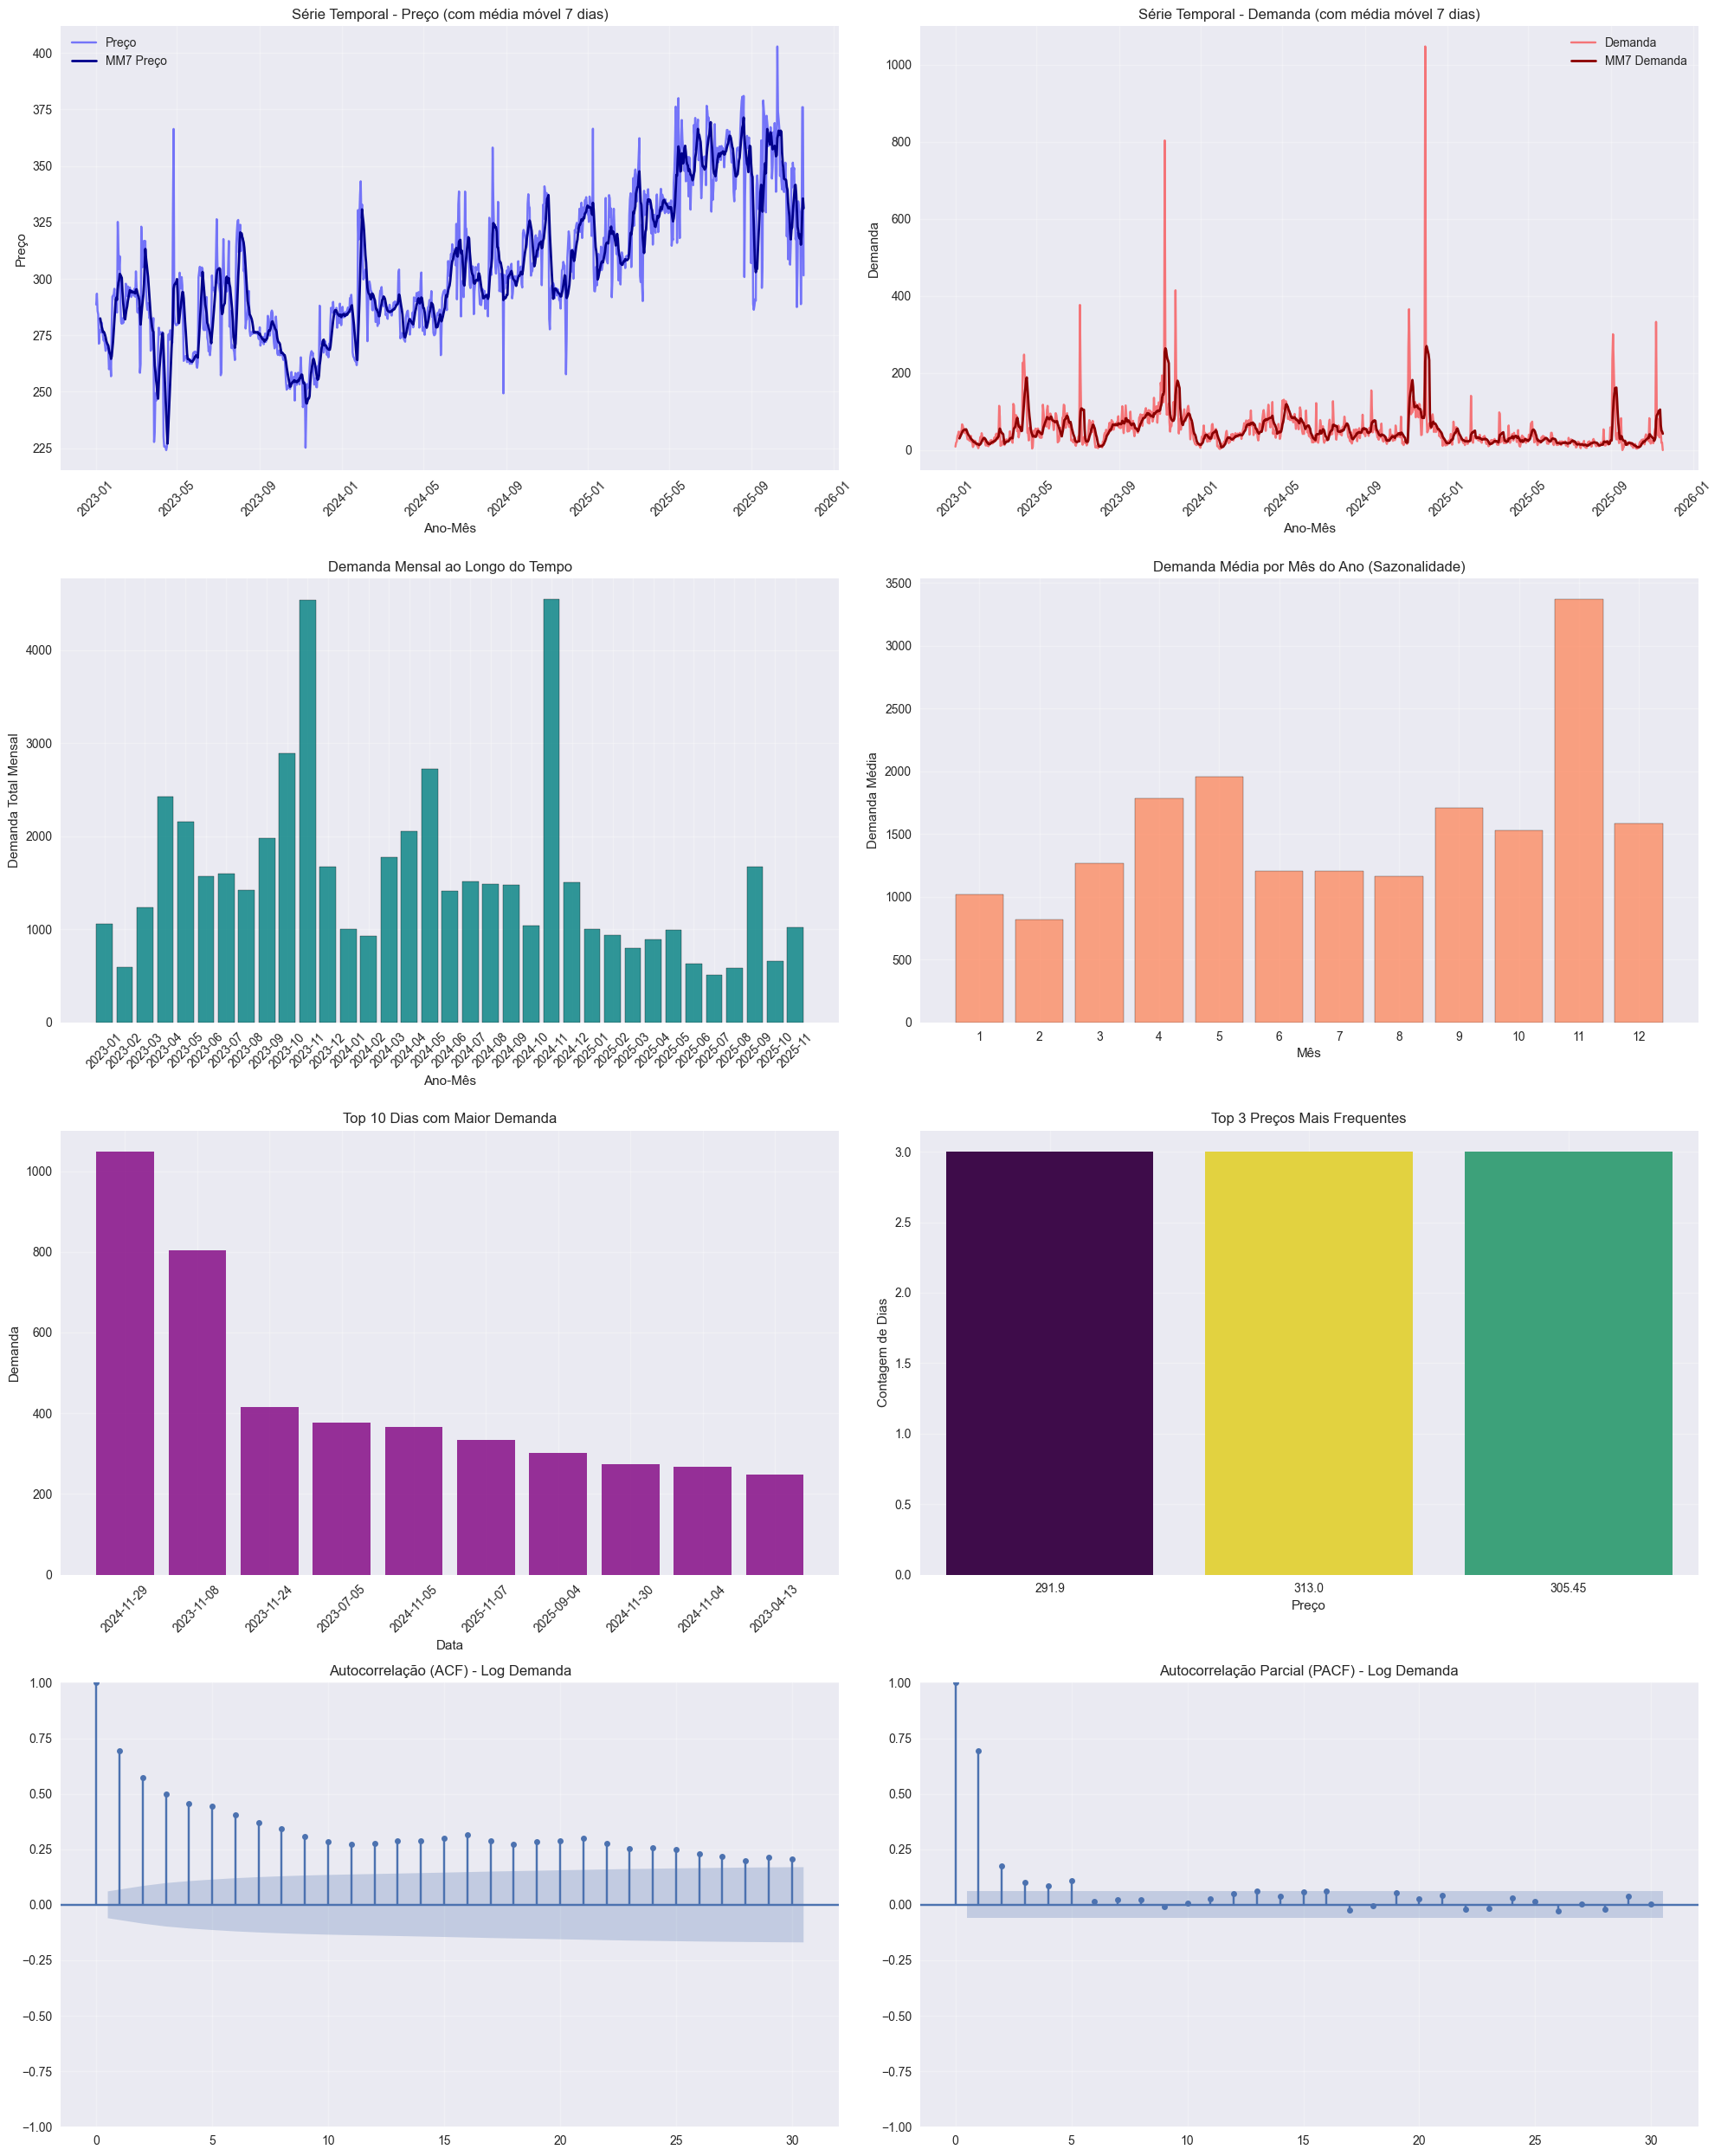

7. ANÁLISE DE SAZONALIDADE POR DIA DA SEMANA:
Demanda média por dia da semana:
  Segunda-feira: 48.31
  Terça-feira: 53.88
  Quarta-feira: 60.44
  Quinta-feira: 54.70
  Sexta-feira: 57.09
  Sábado: 43.26
  Domingo: 43.74

8. RESUMO E RECOMENDAÇÕES PARA MODELAGEM:
TODAS as variáveis são estacionárias - OK para modelagem

 Correlação Log_Preco x Log_Demanda: -0.6607
   → Correlação forte - bom preditor

 RECOMENDAÇÕES FINAIS PARA VALIDAÇÃO CRUZADA:
1. Variáveis já estacionárias - pode prosseguir diretamente
4. Use TimeSeriesSplit do sklearn para validação cruzada temporal
5. Monitore overfitting comparando performance treino/teste
6. Considere modelos SARIMA para capturar sazonalidade

 Análise concluída - Dados prontos para modelagem!


(     AnoMes       Preco  Demanda  Log_Preco  Log_Demanda
 0   2023-01  277.904194   1061.0   5.626527     3.411263
 1   2023-02  293.394643    591.0   5.680941     2.949246
 2   2023-03  283.633548   1231.0   5.644110     3.463641
 3   2023-04  267.952000   2422.0   5.584716     4.070361
 4   2023-05  272.689677   2154.0   5.607218     4.179816
 5   2023-06  289.950333   1572.0   5.668228     3.767679
 6   2023-07  291.666129   1599.0   5.673398     3.480653
 7   2023-08  289.580968   1422.0   5.666726     3.592199
 8   2023-09  275.104667   1975.0   5.616945     4.147224
 9   2023-10  257.608065   2889.0   5.551188     4.519359
 10  2023-11  257.092000   4539.0   5.548512     4.801911
 11  2023-12  277.811613   1675.0   5.626540     3.706341
 12  2024-01  290.621290   1004.0   5.668785     3.225261
 13  2024-02  291.815172    932.0   5.675719     3.401869
 14  2024-03  286.570968   1777.0   5.657736     4.003538
 15  2024-04  284.508667   2051.0   5.650394     4.151876
 16  2024-05  

In [7]:
from Functions.FNC_aval_estat import avaliar_dados_series_temporais

avaliar_dados_series_temporais(Venda,SKU)

### Modelo: Validação Cruzada de Séries Temporais

In [8]:
from Functions.FNC_TSCV import modelo_validacao_cruzada_series_temporais, converter_para_escala_original,encontrar_melhor_alpha


resultados_modelo_principal = modelo_validacao_cruzada_series_temporais(
    Venda, SKU, 
    'Log_Preco', 'Quarta-feira', 'Terça-feira', 'promocionado', #Variáveis independentes
    var_dpd = 'Log_Demanda',                                    #Variáveis dependentes
    n_splits=10
)

# Converter para a escala original
metricas_originais = converter_para_escala_original(resultados_modelo_principal, Venda)

# Encontre o melhor alpha, mas armazene em variáveis diferentes para não sobrescrever
X_cols = ['Log_Preco','Black_Friday','promocionado', 'Quarta-feira','Terça-feira']
y_col = 'Log_Demanda'
melhor_alpha, resultados_alpha = encontrar_melhor_alpha(Venda, X_cols, y_col)

=== MODELO DE VALIDAÇÃO CRUZADA - SKU 7172 ===

Verificando qualidade dos dados...
 Executando validação cruzada temporal...
 Fold 1:
   Período teste: 2023-04-13 a 2023-07-16
   RMSE: 0.7775, WAPE: 16.70%
 Fold 2:
   Período teste: 2023-07-17 a 2023-10-19
   RMSE: 0.5839, WAPE: 13.05%
 Fold 3:
   Período teste: 2023-10-20 a 2024-01-22
   RMSE: 0.6558, WAPE: 13.02%
 Fold 4:
   Período teste: 2024-01-23 a 2024-04-26
   RMSE: 0.5064, WAPE: 11.04%
 Fold 5:
   Período teste: 2024-04-27 a 2024-07-30
   RMSE: 0.6107, WAPE: 13.65%
 Fold 6:
   Período teste: 2024-07-31 a 2024-11-02
   RMSE: 0.4622, WAPE: 10.60%
 Fold 7:
   Período teste: 2024-11-03 a 2025-02-05
   RMSE: 0.7868, WAPE: 16.30%
 Fold 8:
   Período teste: 2025-02-06 a 2025-05-11
   RMSE: 0.3935, WAPE: 9.34%
 Fold 9:
   Período teste: 2025-05-12 a 2025-08-14
   RMSE: 0.3925, WAPE: 10.21%
 Fold 10:
   Período teste: 2025-08-15 a 2025-11-17
   RMSE: 1.2402, WAPE: 17.26%

 RESULTADOS FINAIS DO MODELO
 Métricas Médias nos 10 folds:
   R

### Modelo: SARIMAX 

In [9]:
from Functions.FNC_ARIMAX import modelo_sarimax, encontrar_melhores_parametros_sarimax

# Variáveis exógenas - agora incluindo os dias da semana e a promoção
exog_vars_sarimax = [
    'Log_Preco',
    'Quarta-feira',
    'Terça-feira',
    'promocionado'
]

# Encontrar os melhores parâmetros para o SKU atual, incluindo o termo de tendência (intercepto)
best_order, best_seasonal_order, best_trend = encontrar_melhores_parametros_sarimax(
    Venda,
    SKU,
    exog_vars=exog_vars_sarimax,
    endog_var='Log_Demanda'
)

# Treinar o modelo ARIMAX com os parâmetros otimizados
resultado_sarimax = modelo_sarimax(
    Venda, 
    SKU, 
    *exog_vars_sarimax,
    endog_var='Log_Demanda',
    order= best_order, 
    seasonal_order=best_seasonal_order,
    trend = best_trend
)


--- Buscando Melhores Parâmetros ARIMAX para SKU: 7172 ---

--- Iniciando busca de parâmetros para modelo de Regressão com Erros ARMA (d=0, D=0) ---
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1758.465, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2680.584, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1794.435, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2196.235, Time=0.44 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1756.302, Time=0.87 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1762.609, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1734.922, Time=2.30 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1762.621, Time=0.61 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1486.402, Time=1.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1745.836, Time=0.84 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=1756.528, Time=1.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1497.414, Time=1.14 sec
 ARIMA(3,0,2)(0

### Consolidação e Comparação de Previsões

In [10]:
from Functions.FNC_Previsoes import gerar_previsoes_e_relatorios, gerar_relatorio_comparacao

# Construir o caminho para a planilha de preços de forma robusta
caminho_previsao = os.path.join(project_root, 'Forecast', 'Precos_para_previsoes.xlsx')

# Definir as colunas de features usadas nos modelos
X_cols_tscv = ['Log_Preco', 'Quarta-feira', 'Terça-feira', 'promocionado']

# Carregar a lista de best sellers para aplicar a regra de negócio
best_sellers_list = base_best_sellers['SKU'].astype(str).tolist()

# Gerar as previsões a partir do arquivo de preços, aplicando a regra de best sellers
df_previsoes, _ = gerar_previsoes_e_relatorios(
    resultados_modelo_principal,
    resultado_sarimax,
    SKU,
    caminho_previsao,
    X_cols_tscv=X_cols_tscv,
    best_sellers_list=best_sellers_list
)

# Gerar o relatório de comparação de modelos com todas as colunas
df_relatorio = gerar_relatorio_comparacao(
    resultados_modelo_principal,
    resultado_sarimax,
    SKU,
    X_cols_tscv
)

--- INICIANDO GERAÇÃO DE PREVISÕES E RELATÓRIOS ---

Calculando previsões para o SKU 7172 com o modelo de Validação Cruzada (TSCV)...
Calculando previsões para o SKU 7172 com o modelo ARIMAX...
  DECISÃO: TSCV escolhido como modelo ideal (baseado no AIC)
  INFO: SKU 7172 é um best seller. Aplicando regra de promoção (x2.5).

Arquivo de previsões salvo em: ../Resultados/previsoes_consolidadas_7172.csv
Arquivo de relatório de modelos salvo em: ../Resultados/relatorio_comparacao_modelos_7172.csv

--- Processo Concluído ---


In [11]:
print("DataFrame com as Previsões Consolidadas:")
df_previsoes.head(40)

DataFrame com as Previsões Consolidadas:


,Data,SKU,Preco,previsao_SARIMAX,previsao_TSCV,previsao_total
0,2025-11-01,7172,351,17.522357,14.765468,14.765468
1,2025-11-02,7172,347,19.329832,15.592305,15.592305
2,2025-11-03,7172,349,18.128141,15.172071,15.172071
3,2025-11-04,7172,336,25.153590,20.182452,20.182452
4,2025-11-05,7172,317,40.393018,26.766770,26.766770
5,2025-11-06,7172,320,36.235051,22.916565,22.916565
6,2025-11-07,7172,287,169.984746,68.129044,170.322610
7,2025-11-08,7172,304,73.196735,29.244816,29.244816
8,2025-11-09,7172,334,44.233368,18.695798,18.695798
9,2025-11-10,7172,331,41.736788,19.515153,19.515153


In [12]:
print("DataFrame com o Relatório de Comparação dos Modelos:")
df_relatorio.head()

DataFrame com o Relatório de Comparação dos Modelos:


,sku,data_rodagem,modelo_ideal,intercepto_tscv,coef_log_preco_tscv,coef_quarta-feira_tscv,coef_terça-feira_tscv,coef_promocionado_tscv,intercepto_sarimax,coef_log_preco_sarimax,coef_quarta-feira_sarimax,coef_terça-feira_sarimax,coef_promocionado_sarimax,AIC_sarimax,BIC_sarimax,AIC_cruzado,BIC_cruzado
0,7172,2025-11-17 11:53:31,TSCV,30.553781,-4.753883,0.110523,0.104896,0.572137,3.916477,-6.368653,0.105272,0.119273,0.700963,1460.682603,1500.334966,776.748295,797.175768


### Visualização da Performance das Previsões

--- GERANDO GRÁFICOS DE COMPARAÇÃO DE PREVISÕES PARA SKU 7172 ---


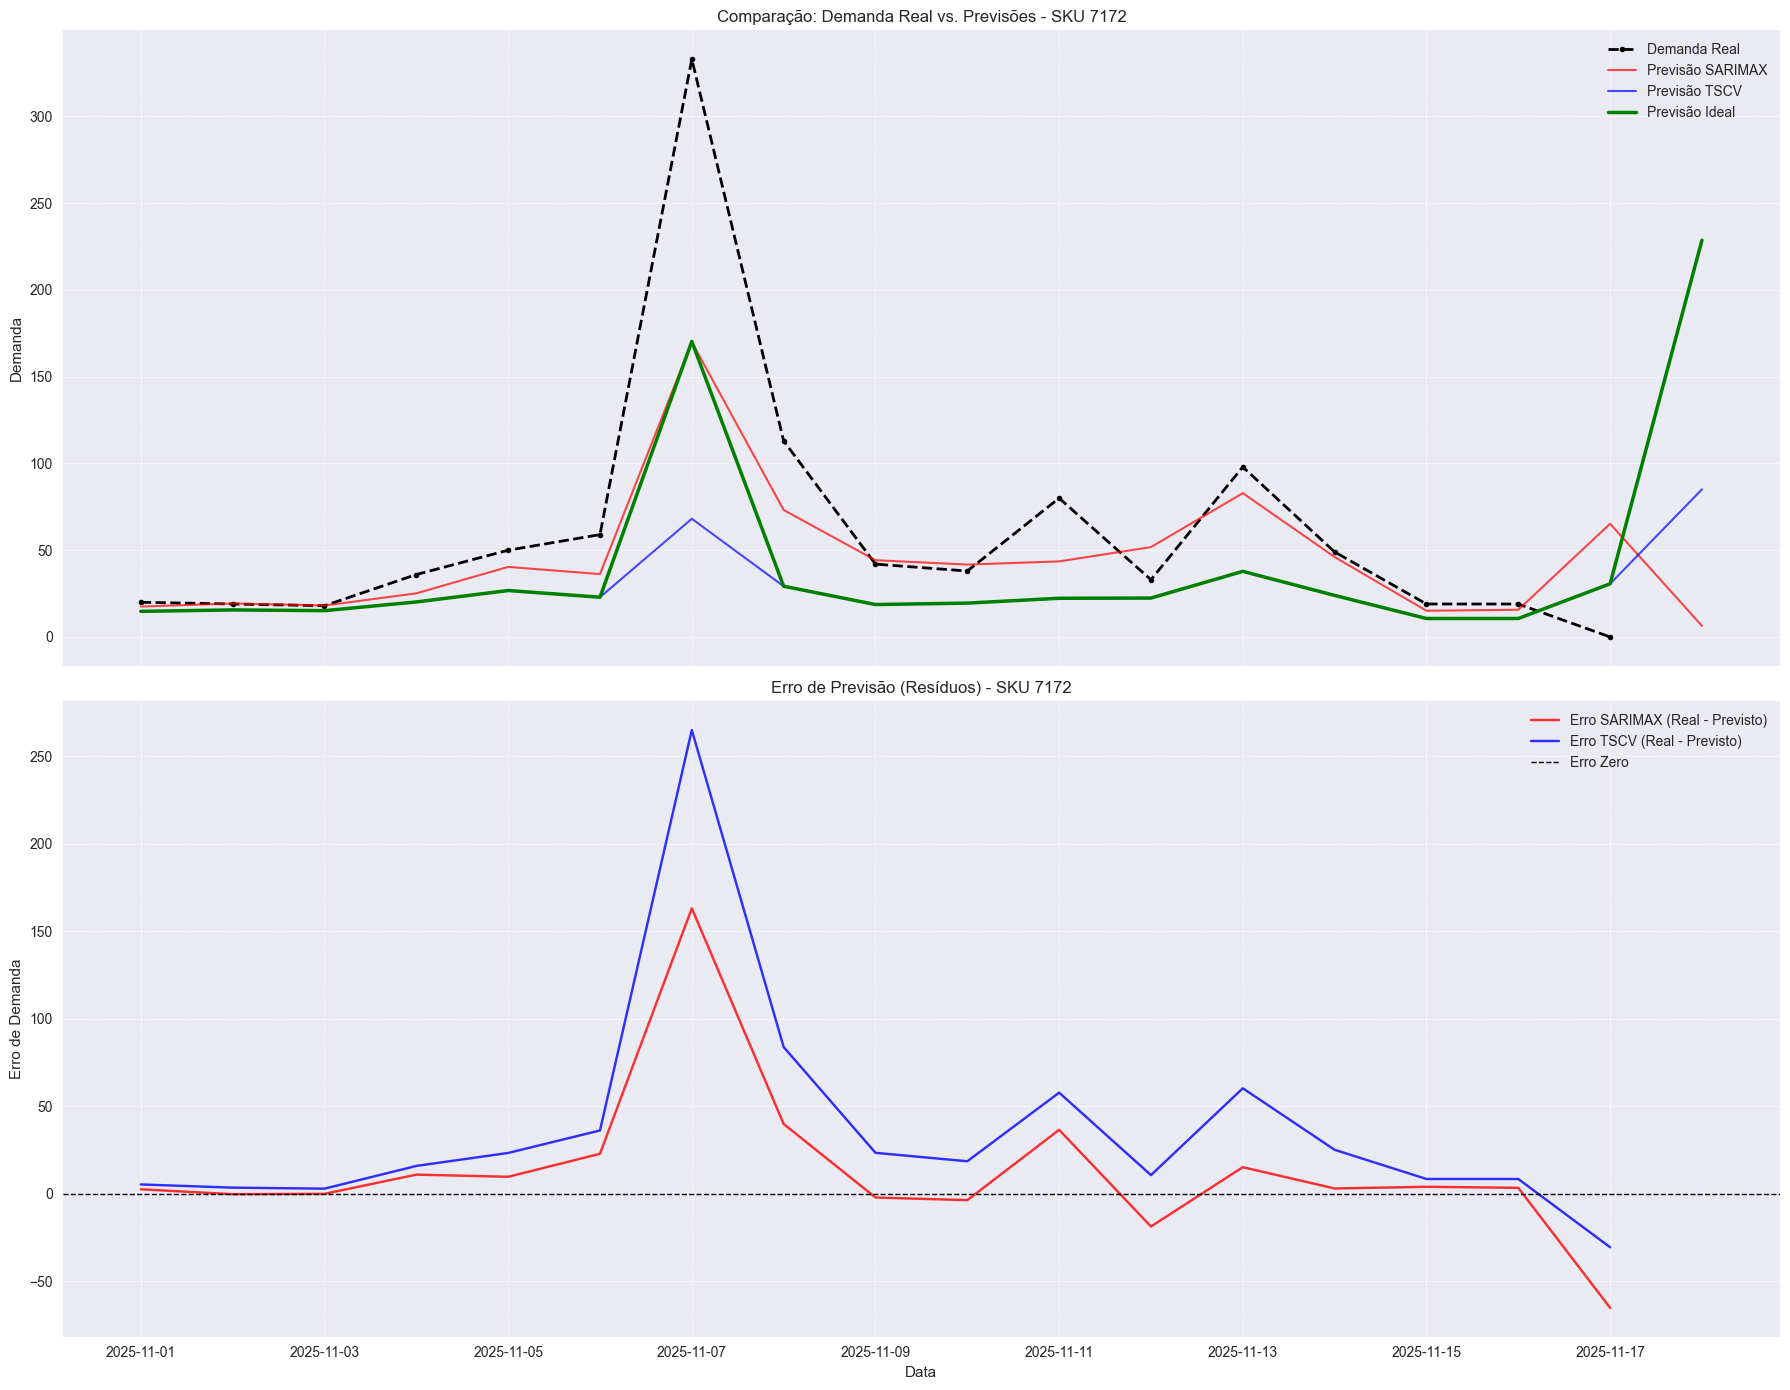

In [13]:
from Functions.FNC_aval_estat import plotar_comparacao_previsoes


plotar_comparacao_previsoes(df_previsoes, Venda, SKU)

### Previsão Futura (Próximos 30 Dias)

--- INICIANDO PREVISÃO PARA OS PRÓXIMOS 30 DIAS (SKU: 7172) ---
Último preço registrado: 301.52 em 2025-11-17
Para os próximos 30 dias, o preço será baseado no mesmo dia 30 dias atrás, ou no último preço se a data não existir.
  INFO: SKU 7172 é um best seller. Aplicando regra de promoção (x2.5) na previsão futura.
  Gerando gráfico de previsão futura...

Gráfico de previsão salvo em: ../Graficos/previsao_30_dias_sku_7172.png


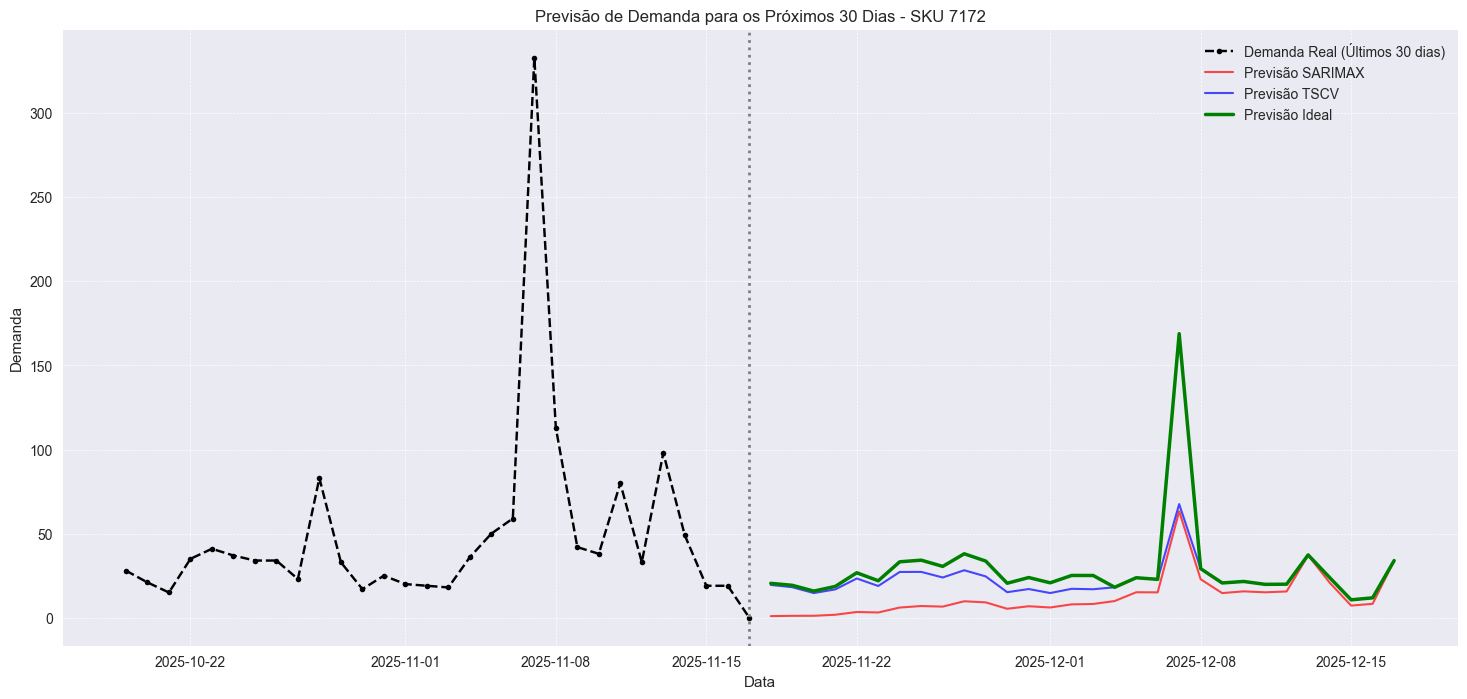

In [14]:
from Functions.FNC_Previsoes import pred_prox_30_dias

# Carregar a lista de best sellers para aplicar a regra de negócio
best_sellers_list = base_best_sellers['SKU'].astype(str).tolist()

# Gerar o gráfico e o DataFrame com a previsão para os próximos 30 dias
df_previsao_futura = pred_prox_30_dias(
    resultados_modelo_principal,
    resultado_sarimax,
    Venda,
    SKU,
    X_cols_tscv=['Log_Preco', 'Quarta-feira', 'Terça-feira', 'promocionado'],
    best_sellers_list=best_sellers_list
)

In [15]:
print("DataFrame com a previsão para os próximos 30 dias:")
df_previsao_futura.head(31)

DataFrame com a previsão para os próximos 30 dias:


,Data,SKU,Preco,promocionado,Log_Preco,Quarta-feira,Terça-feira,previsao_TSCV,previsao_SARIMAX,previsao_total
0,2025-11-18,7172,338.45,0,5.824376,0,1,19.497292,0.947592,20.444884
1,2025-11-19,7172,344.01,0,5.840671,1,0,18.145838,1.130916,19.276754
2,2025-11-20,7172,351.45,0,5.862067,0,0,14.675807,1.158606,15.834413
3,2025-11-21,7172,341.43,0,5.833143,0,0,16.839130,1.770198,18.609328
4,2025-11-22,7172,318.79,0,5.764533,0,0,23.333024,3.401433,26.734458
5,2025-11-23,7172,333.34,0,5.809163,0,0,18.872427,3.110889,21.983316
6,2025-11-24,7172,308.65,0,5.732208,0,0,27.208712,6.054681,33.263392
7,2025-11-25,7172,315.42,0,5.753905,0,1,27.256385,6.962215,34.218600
8,2025-11-26,7172,324.58,0,5.782532,1,0,23.922650,6.600868,30.523518
9,2025-11-27,7172,306.26,0,5.724434,0,0,28.233005,9.785696,38.018701
